## Statistical Analysis on Second Derivative Spectra
(Unsupervised) Principal Component Analysis (PCA) and (supervised) Linear Discriminant Analysis (LDA) on spectral data. 

### 1. PCA
Using PCA to separate drought, semistressed and control cultivars. Then repeating with a detailed legend that uses different markers to distinguish varieties. 

### 2. LDA
Using LDA to separate drought, semistressed and control cultivars.  Then repeating with a detailed legend that uses different markers to distinguish varieties. 

### 3. PCA --> LDA
PCA first to reduce the dimensions based on variance, effectively ignoring the class (drought semistress control) separation, and then LDA classification based on the unsupervised classification principal components. 

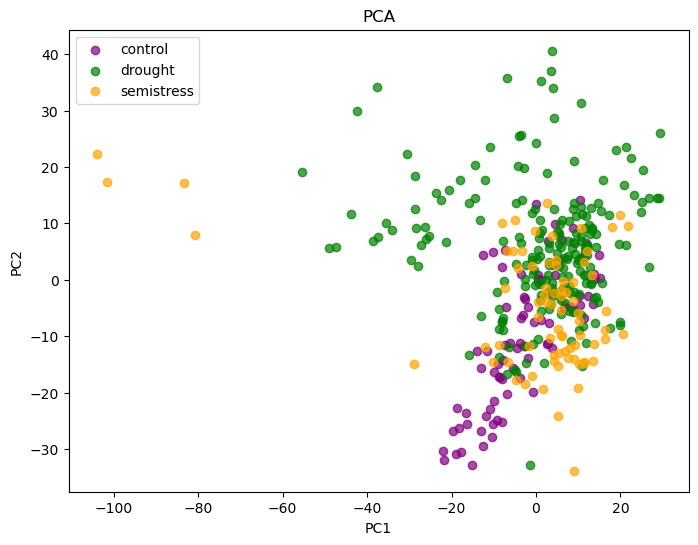

In [1]:
# PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load  data
df = pd.read_csv('/Users/zhalem/Documents/ASD_data/PANGEOS_NO_2025/csv_exports/Corrected_Data_all_spectra_2ndDerivative.csv')

# 'class' is the label column (control, Semistress, drought)
# Selecting only numeric features for PCA
X = df.select_dtypes(include=np.number)
y = df['class']

# Standardize spectra to prevent high-variance wavelengths from dominating
# some wavelengths (e.g. water absorption band regions) have large variances, and will disproportionately contribute to the LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with first three PCs
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# convert to dataframe for later export
spectrum_names = df['spectrumname']

# building PCA dataframe
pca_df = pd.DataFrame({
    'class': y,
    'spectrumname': spectrum_names,
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2]
})

# choosing colors
color_dict = {
    'control': 'purple',
    'semistress': 'orange',
    'drought': 'green'
}

# Plot
plt.figure(figsize=(8,6))
for condition in np.unique(y):
    plt.scatter(
        X_pca[y == condition, 0],
        X_pca[y == condition, 1],
        label=condition,
        color=color_dict[condition],
        alpha=0.7
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()

# plt.savefig('pca_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
# Create the PC table
pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pc_df['class'] = y
print(pc_df.head())

# Print % variance explained by each PC
variance_ratio = pca.explained_variance_ratio_  # array of length n_components
for i, var in enumerate(variance_ratio, start=1):
    print(f"PC{i}: {var*100:.2f}% of variance explained")

# Optional: include variance explained in a summary table
variance_df = pd.DataFrame({
    'PC': [f'PC{i}' for i in range(1, len(variance_ratio)+1)],
    'Variance_Explained (%)': variance_ratio * 100
})
print(variance_df)

# export to csv
pca_df.to_csv(
    '/Users/zhalem/Documents/ASD_data/PANGEOS_NO_2025/csv_exports/Corrected_Data_PCA_table_2ndDerivative.csv',
    index=False
)

        PC1        PC2        PC3       class
0  4.834952   3.520460 -14.892272  semistress
1  6.497381  -0.154054  -7.116684  semistress
2  1.937833  -2.642219  -4.844894  semistress
3  6.015347  -2.847337  -5.077395  semistress
4  4.329106 -13.307011   0.628397  semistress
PC1: 12.58% of variance explained
PC2: 7.98% of variance explained
PC3: 4.54% of variance explained
    PC  Variance_Explained (%)
0  PC1               12.578119
1  PC2                7.982711
2  PC3                4.541398


In [3]:
# create labels for the different varieties
cultivar_map = {
    1101:'Vorobey', 1102:'Festus', 1103:'Zebra', 1104:'Embla',
    1105:'Berserk-4', 1106:'Betong', 1107:'Runar', 1108:'Demonstrant',
    1109:'GN22679', 1110:'GN20503',
    1201:'Seniorita', 1202:'GN21621', 1203:'Felgen', 1204:'Mirakel',
    1205:'Naina#1', 1206:'GN07560', 1207:'Helmi', 1208:'Isak',
    1209:'GN18636', 1210:'Bjarne',
    1301:'GN07560', 1302:'GN18636', 1303:'Seniorita', 1304:'Demonstrant',
    1305:'Zebra', 1306:'Festus', 1307:'Betong', 1308:'GN21621',
    1309:'GN20503', 1310:'Bjarne',
    1401:'Runar', 1402:'Mirakel', 1403:'Embla', 1404:'Berserk-4',
    1405:'Helmi', 1406:'Felgen', 1407:'Naina#1', 1408:'GN22679',
    1409:'Isak', 1410:'Vorobey',
    1501:'GN22679', 1502:'Zebra', 1503:'GN07560', 1504:'Mirakel',
    1505:'Betong', 1506:'GN21621', 1507:'Vorobey', 1508:'Helmi',
    1509:'GN20503', 1510:'GN18636',
    1601:'Demonstrant', 1602:'Isak', 1603:'Naina#1', 1604:'Festus',
    1605:'Berserk-4', 1606:'Bjarne', 1607:'Embla', 1608:'Felgen',
    1609:'Runar', 1610:'Seniorita',
    1701:'Zebra', 1702:'Naina#1', 1703:'GN22679', 1704:'Bjarne',
    1705:'GN18636', 1706:'Isak', 1707:'Mirakel', 1708:'Festus',
    1709:'Felgen', 1710:'GN20503',
    1801:'GN07560', 1802:'Runar', 1803:'Berserk-4', 1804:'Seniorita',
    1805:'Vorobey', 1806:'Embla', 1807:'Demonstrant', 1808:'GN21621',
    1809:'Betong', 1810:'Helmi'
}

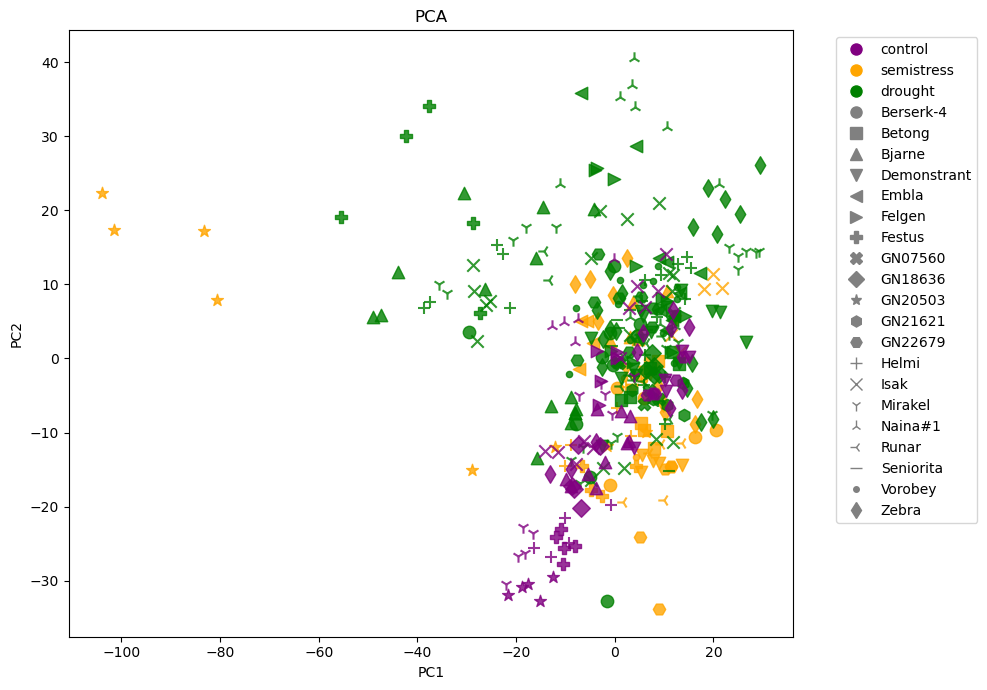

In [4]:
# Repeat PCA plot but with different markers for the different varieties
from matplotlib.lines import Line2D

# Extract numeric spectrum code
pca_df['spectrumcode'] = pca_df['spectrumname'].str.extract(r'plot_(\d+)').astype(int)

# Map to cultivar
pca_df['cultivar'] = pca_df['spectrumcode'].map(cultivar_map)

# Assign unique markers for each cultivar
markers = ['o','s','^','v','<','>','P','X','D','*','h','H','+','x','1','2','3','_','.','d']  
unique_cultivars = sorted(pca_df['cultivar'].unique())
marker_dict = {cultivar: markers[i % len(markers)] for i, cultivar in enumerate(unique_cultivars)}

# Plot PCA points
plt.figure(figsize=(10,7))
for cls in pca_df['class'].unique():
    subset_cls = pca_df[pca_df['class']==cls]
    for cultivar in subset_cls['cultivar'].unique():
        subset_cult = subset_cls[subset_cls['cultivar']==cultivar]
        plt.scatter(
            subset_cult['PC1'],
            subset_cult['PC2'],
            marker=marker_dict[cultivar],
            facecolors=color_dict[cls],               
            s=80,
            alpha=0.8
        )

# Manual legend entries
# Stress treatment colors
color_legend = [Line2D([0],[0], marker='o', color='w', label=cls,
                       markerfacecolor=color_dict[cls], markersize=10)
                for cls in color_dict]

# Cultivar markers
marker_legend = [Line2D([0],[0], marker=marker_dict[cult], color='gray', label=cult,
                        markerfacecolor='gray', markersize=8, linestyle='')
                 for cult in unique_cultivars]

plt.legend(handles=color_legend + marker_legend, bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.tight_layout()
plt.show()


In [5]:
# LDA analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Select wavelength columns only (350–2500)
X = df.loc[:, '350':'2500'].values

# LDA
lda = LinearDiscriminantAnalysis(solver='svd')  # svd is safest for high-dimensional data
X_lda = lda.fit_transform(X_scaled, y)

# assign variable to results
lda_df = pd.DataFrame(
    X_lda,
    columns=[f'LD{i+1}' for i in range(X_lda.shape[1])]
)

lda_df.insert(0, 'spectrumname', spectrum_names)
lda_df.insert(0, 'class', y)

print(lda_df.head())

        class          spectrumname       LD1       LD2
0  semistress  14deg_plot_1101_0000 -1.751635  5.384636
1  semistress  14deg_plot_1101_0001 -2.537980  6.587519
2  semistress  14deg_plot_1101_0002 -2.712388  5.565236
3  semistress  14deg_plot_1101_0003 -2.848747  6.190770
4  semistress  14deg_plot_1101_0004 -3.211201  5.926719


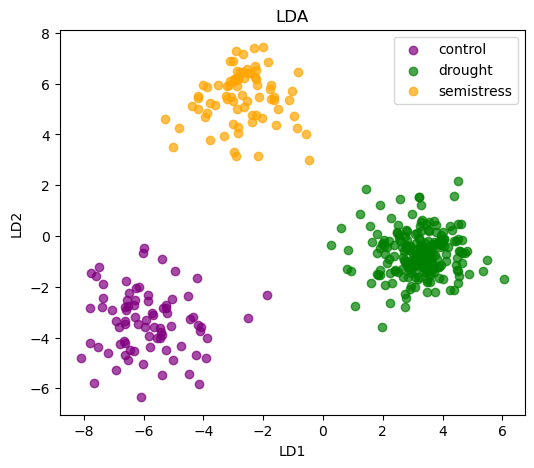

In [6]:
# plot LDA
plt.figure(figsize=(6, 5))
for cls in np.unique(y):
    subset = lda_df[lda_df['class'] == cls]
    plt.scatter(
        subset['LD1'],
        subset['LD2'],
        color=color_dict[cls],
        label=cls,
        alpha=0.7)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA")
plt.legend()
plt.show()

# lda_df.to_csv('/Users/zhalem/Documents/ASD_data/PANGEOS_NO_2025/csv_exports/lda_raw_spectra_scores.csv', index=False)

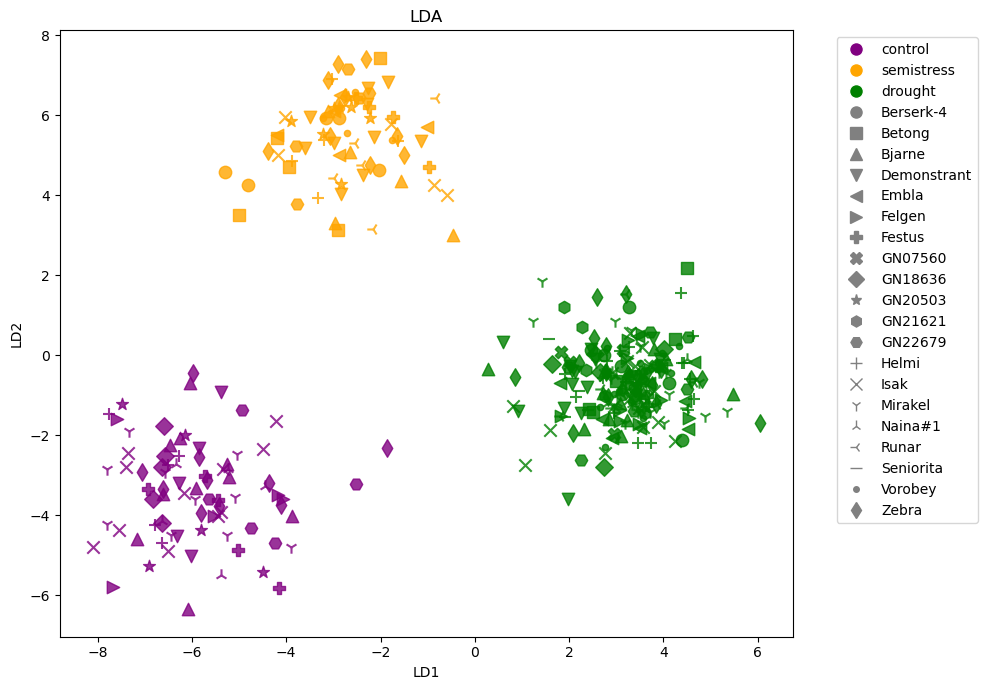

In [7]:
# Repeat LDA plot but with different markers for the different varieties
# Extract numeric spectrum code
lda_df['spectrumcode'] = lda_df['spectrumname'].str.extract(r'plot_(\d+)').astype(int)
lda_df['cultivar'] = lda_df['spectrumcode'].map(cultivar_map)

# Pick visually distinct markers (same as PCA)
markers = ['o','s','^','v','<','>','P','X','D','*','h','H','+','x','1','2','3','_','.','d']
unique_cultivars = sorted(lda_df['cultivar'].unique())
marker_dict = {cultivar: markers[i % len(markers)] for i, cultivar in enumerate(unique_cultivars)}

# Plot
plt.figure(figsize=(10,7))
for cls in lda_df['class'].unique():
    subset_cls = lda_df[lda_df['class']==cls]
    for cultivar in subset_cls['cultivar'].unique():
        subset_cult = subset_cls[subset_cls['cultivar']==cultivar]
        plt.scatter(
            subset_cult['LD1'],
            subset_cult['LD2'],
            marker=marker_dict[cultivar],
            facecolors=color_dict[cls],
            s=80,
            alpha=0.8)

# Manual legend entries
# Color legend (stress)
color_legend = [Line2D([0],[0], marker='o', color='w', label=cls,
                       markerfacecolor=color_dict[cls], markersize=10)
                for cls in color_dict]

# Marker legend (cultivars)
marker_legend = [Line2D([0],[0], marker=marker_dict[cult], color='gray', label=cult,
                        markerfacecolor='gray', markersize=8, linestyle='')
                 for cult in unique_cultivars]

plt.legend(handles=color_legend + marker_legend, bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA")
plt.tight_layout()
plt.show()


        LD1       LD2       class
0  0.548462 -1.153590  semistress
1  0.162369 -0.420588  semistress
2 -0.145769 -0.359068  semistress
3 -0.102480 -0.254155  semistress
4 -1.102672  0.205076  semistress


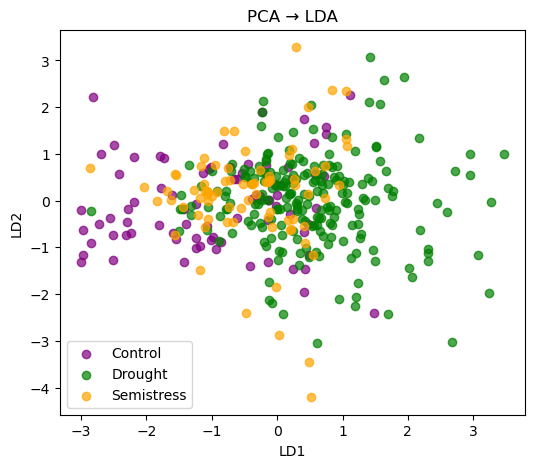

In [8]:
# PCA --> LDA
# reload PCA table as dataframe
df = pd.read_csv(
    '/Users/zhalem/Documents/ASD_data/PANGEOS_NO_2025/csv_exports/Corrected_Data_PCA_table_2ndDerivative.csv')

# Use only PCA scores
X = df[['PC1', 'PC2', 'PC3']].values
y = df['class'].values

# LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

lda_df = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(X_lda.shape[1])])
lda_df['class'] = y

print(lda_df.head())

# Custom colors
color_dict = {
    'control': 'purple',
    'semistress': 'orange',
    'drought': 'green'
}

# Plot
plt.figure(figsize=(6, 5))
for cls in np.unique(y):
    subset = lda_df[lda_df['class'] == cls]
    plt.scatter(
        subset['LD1'],
        subset['LD2'],
        label=cls.capitalize(), 
        color=color_dict[cls],  
        alpha=0.7,)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.title("PCA → LDA")
# plt.savefig('lda_plot.png', dpi=300, bbox_inches='tight')  # save figure
plt.show()


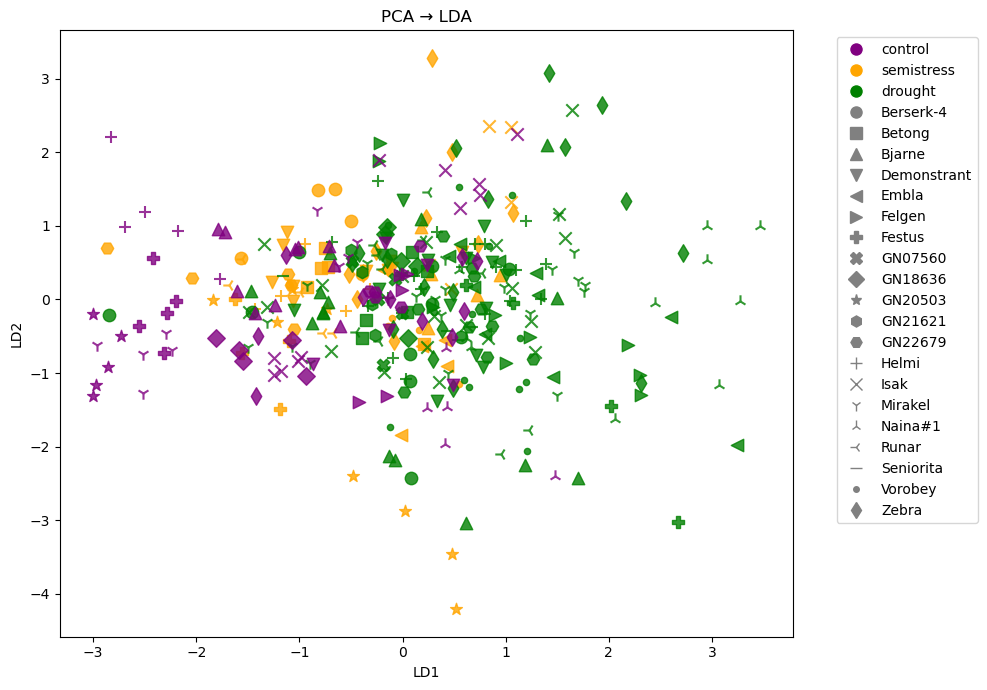

In [9]:
# Repeat PCA-->LDA plot but with different markers for the different varieties
# Labels
spectrum_names = df['spectrumname']
lda_df['spectrumname'] = spectrum_names

# Extract numeric spectrum code
lda_df['spectrumcode'] = lda_df['spectrumname'].str.extract(r'plot_(\d+)').astype(int)
lda_df['cultivar'] = lda_df['spectrumcode'].map(cultivar_map)

# Plot LDA 
plt.figure(figsize=(10,7))

for cls in lda_df['class'].unique():
    subset_cls = lda_df[lda_df['class'] == cls]
    for cultivar in subset_cls['cultivar'].unique():
        subset_cult = subset_cls[subset_cls['cultivar'] == cultivar]
        plt.scatter(
            subset_cult['LD1'],
            subset_cult['LD2'],
            marker=marker_dict[cultivar],
            facecolors=color_dict[cls],
            s=80,
            alpha=0.8)
# manual legend entries        
# Stress group color legend
color_legend = [Line2D([0],[0], marker='o', color='w', label=cls,
                       markerfacecolor=color_dict[cls], markersize=10)
                for cls in color_dict]

# Cultivar marker legend
marker_legend = [Line2D([0],[0], marker=marker_dict[cult], color = 'gray', label=cult,
                        markerfacecolor='gray', markersize=8, linestyle='')
                 for cult in unique_cultivars]

plt.legend(handles=color_legend + marker_legend, bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("PCA → LDA")
plt.tight_layout()
plt.show()
